In [53]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [54]:
#Create a subset of jobs with only Data Analysts in it
df = df[df['job_title_short'] == 'Data Analyst']


In [55]:
df_explode = df.explode('job_skills')


In [60]:
df_count_skill = df_explode.groupby('job_skills').agg(
    skill_count = ('job_skills', 'count'), 
    median_salary = ('salary_year_avg', 'median'))

df_count_skill.sort_values(by='skill_count').head(10)


,skill_count,median_salary
job_skills,,
chainer,1,100000.0
capacitor,1,NaN
esquisse,1,NaN
gtx,1,NaN
msaccess,1,NaN
suse,1,NaN
ovh,1,NaN
nuxt.js,1,NaN
xamarin,2,NaN


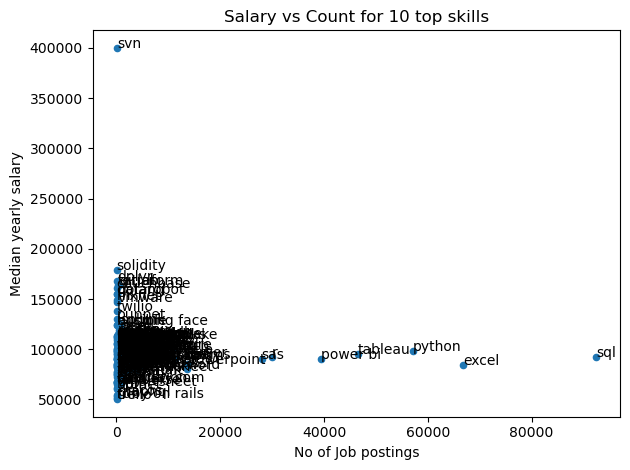

In [61]:
df_count_skill.plot(kind = 'scatter', x = 'skill_count', y = 'median_salary')
plt.xlabel("No of Job postings")
plt.ylabel("Median yearly salary")
plt.title("Salary vs Count for 10 top skills")

for i, txt in enumerate(df_count_skill.index):
    plt.text(df_count_skill['skill_count'].iloc[i], df_count_skill['median_salary'].iloc[i], txt)
plt.tight_layout()
plt.show()